In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/expanded_seqwell/taxa_tables'

In [6]:
ls

ML_taxa_PAV__LAZ.ipynb
ML_taxa_PAV__linear_growth.ipynb
ML_taxa_relabun__LAZ.ipynb
ML_taxa_relabun__linear_growth.ipynb
ML_taxa_seqwell.ipynb
ML_venn_clustermap.ipynb
r100M_PAV_216962_feature-table.biom
r100M_PAV_216962_feature-table_taxa.txt
r100M_PAV_216962_taxa_trans.csv
r100M_metadata.csv
r100M_relabund_216959_feature-table.biom
r100M_relabund_216959_taxa.txt
r100M_relabund_216959_taxa_trans.csv
results/


In [ ]:
# original biom table needs to be transformed so that samples are rows and features are columns...and the end includes metadata categories
# Load microbiome feature data (e.g., OTU table)
# <r100M_relabund_216958_taxa_trans.csv> this biom table has metadata at the end of the feature table to enable subsampling
# Note, for biom table, ensure sample name is same from mapping file (may need to remove prefix)
relabun = pd.read_csv("Table_S19_r100M_relabund_216959_taxa_trans.csv", index_col=0)

# Note for metadata, need to 1) change sample_name to sample_id in metadata 2) remove any samples in metadata which are not included in analysis
# new file is called <
# Load metadata with the target variable
metadata = pd.read_csv("Table_S20_r100M_metadata.csv")

In [ ]:
# shared taxa in PAV and relabund
s__Faecalibacterium_genus_unkn_species
s__Prevotella sp022741625
s__Prevotella copri_C
s__Streptococcus sp000187445
s__Acetatifactor sp003447295
s__Collinsella aerofaciens_H
s__Bifidobacterium breve
s__Prevotella sp900552675
s__Campylobacter infans
s__Anaerostipes hadrus
s__Streptococcus salivarius
s__Roseburia inulinivorans
s__Streptococcus_genus_unkn_species
s__Streptococcus sp934229725
s__Bifidobacterium kashiwanohense_A
s__Prevotella sp900290275
s__Limisoma sp000437795
s__Selenomonadaceae_family_unkn_genus_unkn_species
s__Helicobacter_B fennelliae
s__CAG-882 sp003486385
s__Bifidobacterium bifidum
s__Faecalibacterium sp003449675
s__Blautia_A wexlerae
s__Prevotella sp900546575
s__Prevotella sp021636625
s__Faecalibacterium prausnitzii_A
s__Sutterella wadsworthensis
s__Parolsenella uli_B
s__Prevotella sp900551275
s__Cryptobacteroides sp000435075
s__Acetatifactor intestinalis
s__Prevotella sp900554835
s__Megasphaera sp900540735
s__Parolsenella uli_A
s__Enterocloster sp900541315
s__Bacteroides caccae
s__Hominiventricola filiformis
s__Faecalibacterium sp900539885
s__Faecousia sp900549705
s__Prevotella sp900313215
s__Alloprevotella sp900539625
s__Alloprevotella sp900540885
s__Alloprevotella timonensis
s__Faecalibacterium prausnitzii_D
s__Prevotella copri_I
s__Prevotella sp003447235
s__Bifidobacterium adolescentis
s__Bacteroides thetaiotaomicron
s__Senegalimassilia sp003474385
s__Agathobaculum butyriciproducens
s__Prevotella stercorea
s__Bacteroides uniformis
s__Prevotella merdae
s__CAG-510 sp000434615
s__Selenomonas_A sp900769615
s__Streptococcus salivarius_D
s__CAG-95 sp900066375

In [23]:
relabun.head()

,s__14-2 sp902463835,s__14-2 sp934434905,s__Acetatifactor acetigignens,s__Acetatifactor intestinalis,s__Acetatifactor sp003447295,s__Acetatifactor sp900066565,s__Acetatifactor sp900554205,s__Acetatifactor sp900755865,s__Acetatifactor sp900760705,s__Acetatifactor sp900766575,...,s__sapiens HG03453,unclassified,breastfed,hsid,linear_growth,laz_stunting_bool,linear_growth_num,site_village,collection_week,order
sample_id,,,,,,,,,,,,,,,,,,,,,
15889.500.FB00259114,0,0,0,0,0,191776,0,0,0,0,...,0,33593223,1,500,good,1,1,Limera,24,good.500.24
15889.500.FB00862515,0,0,0,93569,0,0,0,0,0,0,...,0,30029010,1,500,good,1,1,Limera,0,good.500.0
15889.500.FB00929809,0,0,0,0,0,0,630286,0,0,0,...,0,49844774,1,500,good,1,1,Limera,36,good.500.36
15889.500.FB00935447,0,0,40685,0,29426,0,0,0,0,0,...,0,40038544,1,500,good,1,1,Limera,48,good.500.48
15889.504.FB00259057,0,0,0,0,136055,52512,0,0,0,0,...,0,37683345,1,504,mixed,0,mixed,Limera,24,mixed.504.24


In [26]:
# remove mixed samples
rmmix=relabun.loc[relabun['linear_growth']!='mixed']
rmmix.head(10)

,s__14-2 sp902463835,s__14-2 sp934434905,s__Acetatifactor acetigignens,s__Acetatifactor intestinalis,s__Acetatifactor sp003447295,s__Acetatifactor sp900066565,s__Acetatifactor sp900554205,s__Acetatifactor sp900755865,s__Acetatifactor sp900760705,s__Acetatifactor sp900766575,...,s__sapiens HG03453,unclassified,breastfed,hsid,linear_growth,laz_stunting_bool,linear_growth_num,site_village,collection_week,order
sample_id,,,,,,,,,,,,,,,,,,,,,
15889.500.FB00259114,0,0,0,0,0,191776,0,0,0,0,...,0,33593223,1,500,good,1,1,Limera,24,good.500.24
15889.500.FB00862515,0,0,0,93569,0,0,0,0,0,0,...,0,30029010,1,500,good,1,1,Limera,0,good.500.0
15889.500.FB00929809,0,0,0,0,0,0,630286,0,0,0,...,0,49844774,1,500,good,1,1,Limera,36,good.500.36
15889.500.FB00935447,0,0,40685,0,29426,0,0,0,0,0,...,0,40038544,1,500,good,1,1,Limera,48,good.500.48
15889.510.FB00267791,0,0,0,96712,262313,12433,0,0,0,0,...,0,33777502,0,510,bad,0,0,Limera,24,bad.510.24
15889.510.FB00862361,0,0,0,1555481,103580,54983,73540,0,0,0,...,0,36412346,0,510,bad,1,0,Limera,12,bad.510.12
15889.510.FB00862556,0,0,0,392722,0,0,0,0,0,0,...,0,23622152,0,510,bad,1,0,Limera,0,bad.510.0
15889.510.FB00933916,0,0,0,0,0,0,0,0,0,0,...,0,42675493,0,510,bad,1,0,Limera,48,bad.510.48
15889.510.FB00941907,0,0,14404,108032,298572,0,0,0,0,0,...,0,35180979,0,510,bad,1,0,Limera,36,bad.510.36


In [35]:
# subsample the larger table for only the shared taxa of (top 100) PAV and relabund
shared=rmmix[["s__Faecalibacterium_genus_unkn_species",
"s__Prevotella sp022741625",
"s__Prevotella copri_C",
"s__Streptococcus sp000187445",
"s__Acetatifactor sp003447295",
"s__Collinsella aerofaciens_H",
"s__Bifidobacterium breve",
"s__Prevotella sp900552675",
"s__Campylobacter infans",
"s__Anaerostipes hadrus",
"s__Streptococcus salivarius",
"s__Roseburia inulinivorans",
"s__Streptococcus_genus_unkn_species",
"s__Streptococcus sp934229725",
"s__Bifidobacterium kashiwanohense_A",
"s__Prevotella sp900290275",
"s__Limisoma sp000437795",
"s__Selenomonadaceae_family_unkn_genus_unkn_species",
"s__Helicobacter_B fennelliae",
"s__CAG-882 sp003486385",
"s__Bifidobacterium bifidum",
"s__Faecalibacterium sp003449675",
"s__Blautia_A wexlerae",
"s__Prevotella sp900546575",
"s__Prevotella sp021636625",
"s__Faecalibacterium prausnitzii_A",
"s__Sutterella wadsworthensis",
"s__Parolsenella uli_B",
"s__Prevotella sp900551275",
"s__Cryptobacteroides sp000435075",
"s__Acetatifactor intestinalis",
"s__Prevotella sp900554835",
"s__Megasphaera sp900540735",
"s__Parolsenella uli_A",
"s__Enterocloster sp900541315",
"s__Bacteroides caccae",
"s__Hominiventricola filiformis",
"s__Faecalibacterium sp900539885",
"s__Faecousia sp900549705",
"s__Prevotella sp900313215",
"s__Alloprevotella sp900539625",
"s__Alloprevotella sp900540885",
"s__Alloprevotella timonensis",
"s__Faecalibacterium prausnitzii_D",
"s__Prevotella copri_I",
"s__Prevotella sp003447235",
"s__Bifidobacterium adolescentis",
"s__Bacteroides thetaiotaomicron",
"s__Senegalimassilia sp003474385",
"s__Agathobaculum butyriciproducens",
"s__Prevotella stercorea",
"s__Bacteroides uniformis",
"s__Prevotella merdae",
"s__CAG-510 sp000434615",
"s__Selenomonas_A sp900769615",
"s__Streptococcus salivarius_D",
"s__CAG-95 sp900066375",
"linear_growth"]]

In [40]:
# sort feature table by the order good.hsid.timepoint  or bad.hsid.timepoint
shared_sorted=shared.sort_values("linear_growth")
shared_sorted.head(100)

,s__Faecalibacterium_genus_unkn_species,s__Prevotella sp022741625,s__Prevotella copri_C,s__Streptococcus sp000187445,s__Acetatifactor sp003447295,s__Collinsella aerofaciens_H,s__Bifidobacterium breve,s__Prevotella sp900552675,s__Campylobacter infans,s__Anaerostipes hadrus,...,s__Senegalimassilia sp003474385,s__Agathobaculum butyriciproducens,s__Prevotella stercorea,s__Bacteroides uniformis,s__Prevotella merdae,s__CAG-510 sp000434615,s__Selenomonas_A sp900769615,s__Streptococcus salivarius_D,s__CAG-95 sp900066375,linear_growth
sample_id,,,,,,,,,,,,,,,,,,,,,
15889.776.FB01923395,138338,0,508377,0,0,0,0,0,0,122075,...,0,45237,73169,0,0,0,0,0,0,bad
15889.870.FB00259079,0,0,329303,0,0,710856,221640,0,646392,0,...,0,121819,0,0,0,0,0,0,0,bad
15889.776.FB01125857,345094,46800,0,0,0,84193,9745,0,98845,0,...,0,9802,59297,0,18773,0,0,0,0,bad
15889.776.FB00937119,178120,343616,97779,0,0,155593,0,0,728989,0,...,0,0,0,97653,35674,0,0,0,184184,bad
15889.776.FB00259711,0,0,344527,0,0,68007,39750,0,0,0,...,0,0,0,129128,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15889.641.FB00862889,0,0,0,54947,0,223444,41612,0,43098,197170,...,0,13281,21505,0,0,0,0,0,0,good
15889.641.FB00258801,0,0,0,65120,0,38142,0,0,249748,236822,...,0,0,0,0,0,0,0,0,0,good
15889.640.FB00258976,0,0,0,110917,0,0,38878,0,3806532,4036670,...,0,436758,0,0,0,0,0,0,0,good


In [41]:
features_only=shared_sorted.drop(columns=["linear_growth"])

In [42]:
#square root transform to improve Viz
sqrt_features_only=np.sqrt(features_only)

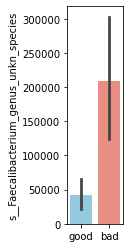

In [268]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecalibacterium_genus_unkn_species", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecalibacterium_genus_unkn_species.png", dpi=600,bbox_inches="tight")


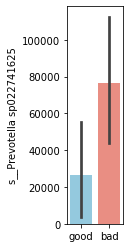

In [269]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp022741625", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp022741625.png", dpi=600,bbox_inches="tight")


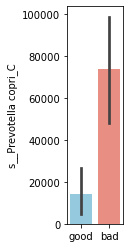

In [270]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella copri_C", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella copri_C.png", dpi=600,bbox_inches="tight")


In [271]:
plt.subplots?

In [272]:
#example how to make subplots
#fig,axes=plt.subplots(2,3, figsize=(6,6)) #indicates the shape
#colors=["skyblue", "salmon"]
#sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus sp000187445", palette=colors,ax=axes[0][1]) # row,column: 0,0 top left, 0,1
#a.set(xlabel=None)
#plt.savefig("results/s__Streptococcus sp000187445.png", dpi=600,bbox_inches="tight")


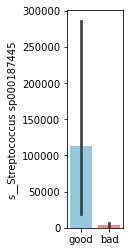

In [273]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus sp000187445", palette=colors) # row,column: 0,0 top left, 0,1
a.set(xlabel=None)
plt.savefig("results/s__Streptococcus sp000187445.png", dpi=600,bbox_inches="tight")


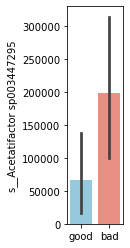

In [274]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Acetatifactor sp003447295", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Acetatifactor sp003447295.png", dpi=600,bbox_inches="tight")


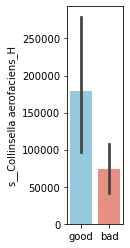

In [275]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Collinsella aerofaciens_H", palette=colors)
a.set(xlabel=None)

plt.savefig("results/s__Collinsella aerofaciens_H.png", dpi=600,bbox_inches="tight")


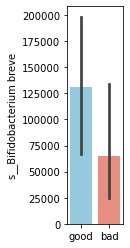

In [276]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bifidobacterium breve", palette=colors)
a.set(xlabel=None)

plt.savefig("results/s__Bifidobacterium breve.png", dpi=600,bbox_inches="tight")


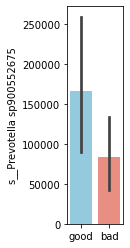

In [277]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900552675", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900552675.png", dpi=600,bbox_inches="tight")


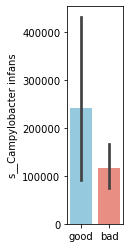

In [278]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Campylobacter infans", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Campylobacter infans.png", dpi=600,bbox_inches="tight")


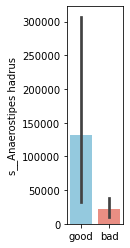

In [279]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Anaerostipes hadrus", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Anaerostipes hadrus.png", dpi=600,bbox_inches="tight")


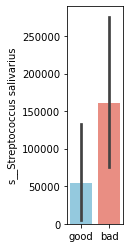

In [280]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus salivarius", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Streptococcus salivarius.png", dpi=600,bbox_inches="tight")


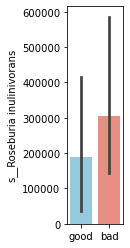

In [281]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Roseburia inulinivorans", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Roseburia inulinivorans.png", dpi=600,bbox_inches="tight")


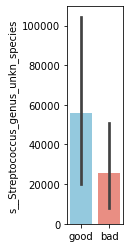

In [282]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus_genus_unkn_species", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Streptococcus_genus_unkn_species.png", dpi=600,bbox_inches="tight")


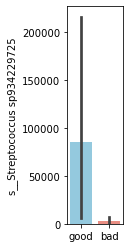

In [283]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus sp934229725", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Streptococcus sp934229725.png", dpi=600,bbox_inches="tight")


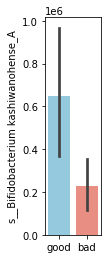

In [284]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bifidobacterium kashiwanohense_A", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bifidobacterium kashiwanohense_A.png", dpi=600,bbox_inches="tight")


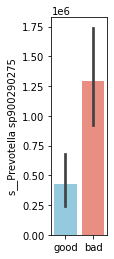

In [285]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900290275", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900290275.png", dpi=600,bbox_inches="tight")


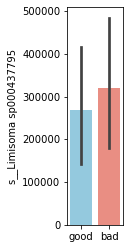

In [286]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Limisoma sp000437795", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Limisoma sp000437795.png", dpi=600,bbox_inches="tight")


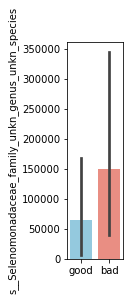

In [287]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Selenomonadaceae_family_unkn_genus_unkn_species", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Selenomonadaceae_family_unkn_genus_unkn_species.png", dpi=600,bbox_inches="tight")


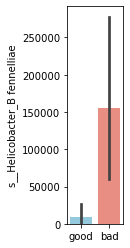

In [288]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Helicobacter_B fennelliae", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Helicobacter_B fennelliae.png", dpi=600,bbox_inches="tight")


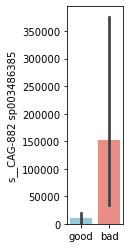

In [289]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__CAG-882 sp003486385", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__CAG-882 sp003486385.png", dpi=600,bbox_inches="tight")


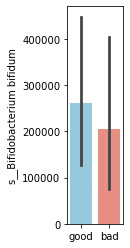

In [290]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bifidobacterium bifidum", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bifidobacterium bifidum.png", dpi=600,bbox_inches="tight")


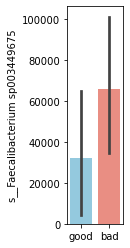

In [291]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecalibacterium sp003449675", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecalibacterium sp003449675.png", dpi=600,bbox_inches="tight")


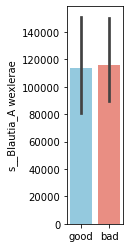

In [292]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Blautia_A wexlerae", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Blautia_A wexlerae.png", dpi=600,bbox_inches="tight")


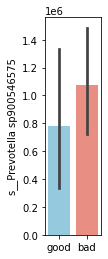

In [293]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900546575", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900546575.png", dpi=600,bbox_inches="tight")


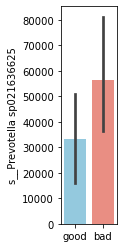

In [294]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp021636625", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp021636625.png", dpi=600,bbox_inches="tight")


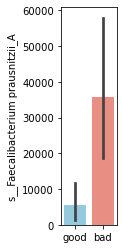

In [295]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecalibacterium prausnitzii_A", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecalibacterium prausnitzii_A.png", dpi=600,bbox_inches="tight")


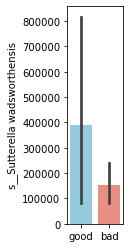

In [296]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Sutterella wadsworthensis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Sutterella wadsworthensis.png", dpi=600,bbox_inches="tight")


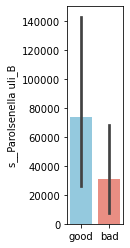

In [297]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Parolsenella uli_B", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Parolsenella uli_B.png", dpi=600,bbox_inches="tight")


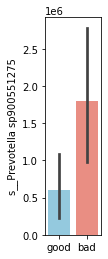

In [298]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900551275", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900551275.png", dpi=600,bbox_inches="tight")


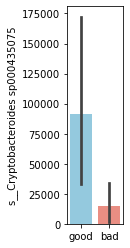

In [299]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Cryptobacteroides sp000435075", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Cryptobacteroides sp000435075.png", dpi=600,bbox_inches="tight")


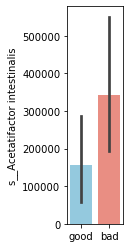

In [300]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Acetatifactor intestinalis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Acetatifactor intestinalis.png", dpi=600,bbox_inches="tight")


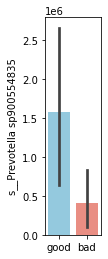

In [301]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900554835", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900554835.png", dpi=600,bbox_inches="tight")


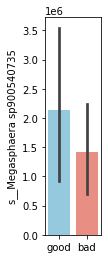

In [302]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Megasphaera sp900540735", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Megasphaera sp900540735.png", dpi=600,bbox_inches="tight")


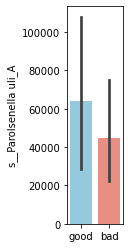

In [303]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Parolsenella uli_A", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Parolsenella uli_A.png", dpi=600,bbox_inches="tight")


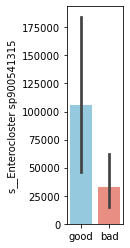

In [304]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Enterocloster sp900541315", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Enterocloster sp900541315.png", dpi=600,bbox_inches="tight")


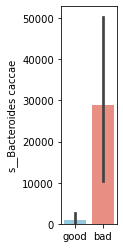

In [305]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bacteroides caccae", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bacteroides caccae.png", dpi=600,bbox_inches="tight")


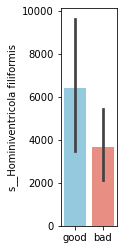

In [306]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Hominiventricola filiformis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Hominiventricola filiformis.png", dpi=600,bbox_inches="tight")


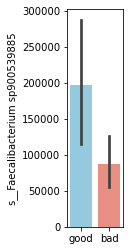

In [307]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecalibacterium sp900539885", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecalibacterium sp900539885.png", dpi=600,bbox_inches="tight")


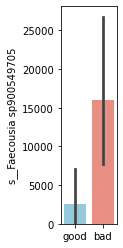

In [308]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecousia sp900549705", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecousia sp900549705.png", dpi=600,bbox_inches="tight")


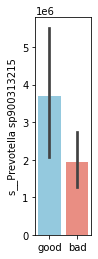

In [309]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp900313215", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp900313215.png", dpi=600,bbox_inches="tight")


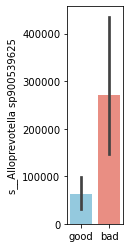

In [310]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Alloprevotella sp900539625", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Alloprevotella sp900539625.png", dpi=600,bbox_inches="tight")


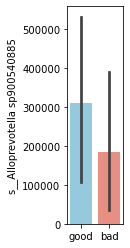

In [311]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Alloprevotella sp900540885", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Alloprevotella sp900540885.png", dpi=600,bbox_inches="tight")


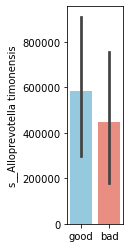

In [312]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Alloprevotella timonensis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Alloprevotella timonensis.png", dpi=600,bbox_inches="tight")


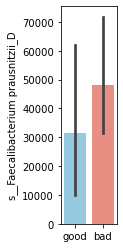

In [313]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Faecalibacterium prausnitzii_D", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Faecalibacterium prausnitzii_D.png", dpi=600,bbox_inches="tight")


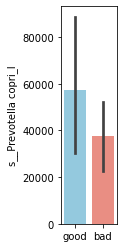

In [314]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella copri_I", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella copri_I.png", dpi=600,bbox_inches="tight")


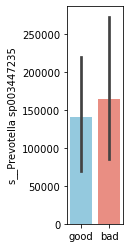

In [315]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella sp003447235", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella sp003447235.png", dpi=600,bbox_inches="tight")


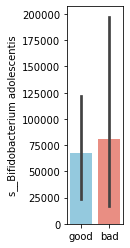

In [316]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bifidobacterium adolescentis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bifidobacterium adolescentis.png", dpi=600,bbox_inches="tight")


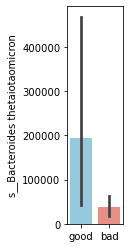

In [317]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bacteroides thetaiotaomicron", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bacteroides thetaiotaomicron.png", dpi=600,bbox_inches="tight")


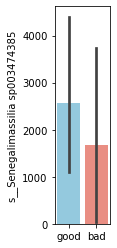

In [318]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Senegalimassilia sp003474385", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Senegalimassilia sp003474385.png", dpi=600,bbox_inches="tight")


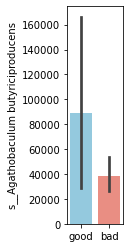

In [319]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Agathobaculum butyriciproducens", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Agathobaculum butyriciproducens.png", dpi=600,bbox_inches="tight")


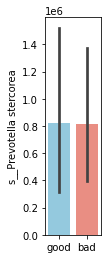

In [320]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella stercorea", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella stercorea.png", dpi=600,bbox_inches="tight")


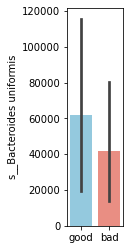

In [321]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Bacteroides uniformis", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Bacteroides uniformis.png", dpi=600,bbox_inches="tight")


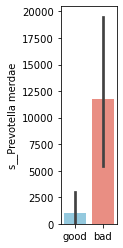

In [322]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Prevotella merdae", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Prevotella merdae.png", dpi=600,bbox_inches="tight")


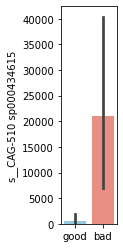

In [323]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__CAG-510 sp000434615", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__CAG-510 sp000434615.png", dpi=600,bbox_inches="tight")


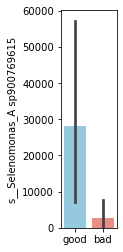

In [324]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Selenomonas_A sp900769615", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Selenomonas_A sp900769615.png", dpi=600,bbox_inches="tight")


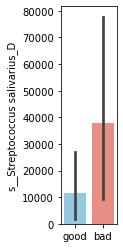

In [325]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__Streptococcus salivarius_D", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__Streptococcus salivarius_D.png", dpi=600,bbox_inches="tight")


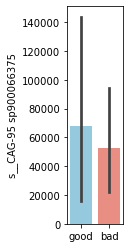

In [326]:
plt.figure(figsize=(1,4))
colors=["skyblue", "salmon"]
a=sns.barplot(data=shared, x="linear_growth", y="s__CAG-95 sp900066375", palette=colors)
a.set(xlabel=None)
plt.savefig("results/s__CAG-95 sp900066375.png", dpi=600,bbox_inches="tight")


In [327]:
# perform figures for functional

ML_taxa_PAV__LAZ.ipynb
ML_taxa_PAV__linear_growth.ipynb
ML_taxa_relabun__LAZ.ipynb
ML_taxa_relabun__linear_growth.ipynb
ML_taxa_seqwell.ipynb
ML_venn_results.ipynb
r100M_PAV_216962_feature-table.biom
r100M_PAV_216962_feature-table_taxa.txt
r100M_PAV_216962_taxa_trans.csv
r100M_metadata.csv
r100M_relabund_216959_feature-table.biom
r100M_relabund_216959_taxa.txt
r100M_relabund_216959_taxa_trans.csv
results/
